<a href="https://colab.research.google.com/github/nshaw928/python_final/blob/main/final_avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nicholas Shaw
Group 23

M13209305

I have created 1 table, 6 plots, and created a visualization of K Means clustering in this project.

Project Expectations (copy/paste of email)
1.	Graph the raw data, (ex: x axis is price, y axis volume and color coded based on organic or not. u can also change the shape of marker based on the year)
2.	basic statistics table: create a table:
      Group data based on location
      average price for each year
      total number of prices reported/ u can also split organic and not organic
3.	Graph processed data;  (e.g. x axis is year, y axis average price or total volume u have different colors for different cities)


Describe the data:
The data used in this project is an dataset of avacado sales in the United States by week. The data is grouped by location. For this project I used the Total US data, Cincinnati / Dayton region data, and New York City and Los Angeles data. I will explain each plot above the plot with a text block. The other data I used was the type of avacado (conventional vs organic), total volume, and average price. I decided to break up the data from the beggining and not graph the data raw because the dataset had overlapping data due to the fact that the regions column contained groups of cities, regions, and the total US, making some data counted two or three times. Example: an avocado bought in New York City would be counted in the New York, Northeast, and Total US data.

In [114]:
# This block of code just imports necessary libraries and creates the dataframes that will be worked with from the dataset I uploaded and linked to on my GitHub

from __future__ import print_function
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
import plotly.graph_objects as go

# Sets the theme for seaborn plots
sns.set_theme()

# Downloads data and creates a dataframe of the csv file
url = 'https://raw.githubusercontent.com/nshaw928/python_final/main/avocado.csv'
df = pd.read_csv(url, index_col=0, parse_dates=True)

# Divides the dataframe into workable sections of interest
df_us = df[df['region'] == 'TotalUS']
df_cincy = df[df['region'] == 'CincinnatiDayton']
df_nyc = df[df['region'] == 'NewYork']
df_la = df[df['region'] == 'LosAngeles']

# Combines sections of the dataframe back together to create dataframes for analysis across regions
df_four = pd.concat([df_us, df_cincy, df_nyc, df_la])
df_cities = pd.concat([df_cincy, df_nyc, df_la])


The following code generates a table of the Average Price per region over the course of 4 years and displays an average price of all 4 years below. The code is lightly commented. I wrote a funciton that would return a list of the average price per year and the average across all 4 of those years and used that function when creating the table. The function took an input of a dataframe and I just passed it the dataframe for whatever region I wanted.

In [115]:
def table_values(dfx):
  # Groups data by year and finds the average price per year based off the average price per week
  df_v = dfx.groupby('year')['AveragePrice'].mean()
  v_2015 = df_v[2015]
  v_2016 = df_v[2016]
  v_2017 = df_v[2017]
  v_2018 = df_v[2018]
  v_avg = mean([v_2015, v_2016, v_2017, v_2018])
  return [round(v_2015, 2), round(v_2016, 2), round(v_2017, 2), round(v_2018, 2), round(v_avg, 2),]

# Creates table
table = go.Figure(data=[go.Table( 
  # Header of the table
  header=dict(
    values=['<b>Year</b>','<b>Cincinnati / Dayton</b>','<b>New York</b>','<b>Los Angeles</b>','<b>United States</b>'],
    line_color='darkslategray',
    fill_color='grey',
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  # Content of the table
  cells=dict(
    values=[
      ['2015', '2016', '2017', '2018', '<b>Combined</b>'],
      table_values(df_cincy),
      table_values(df_nyc),
      table_values(df_la),
      table_values(df_us)],
    line_color='darkslategray',
    fill_color = ['white'],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

table.show()

This graph is one of my favorites, it is similar to one of the ones outlined in the project expectations, but I made the year to be varible in color instead of the type because the year was not easily visualized as different markers. In this plot you can see how sales went up as the price was lowered. The data in this plot are the sales from Cincinnati / Dayton.

Text(0.5, 1.0, 'Avocado Volume vs Price in Cincinnati')

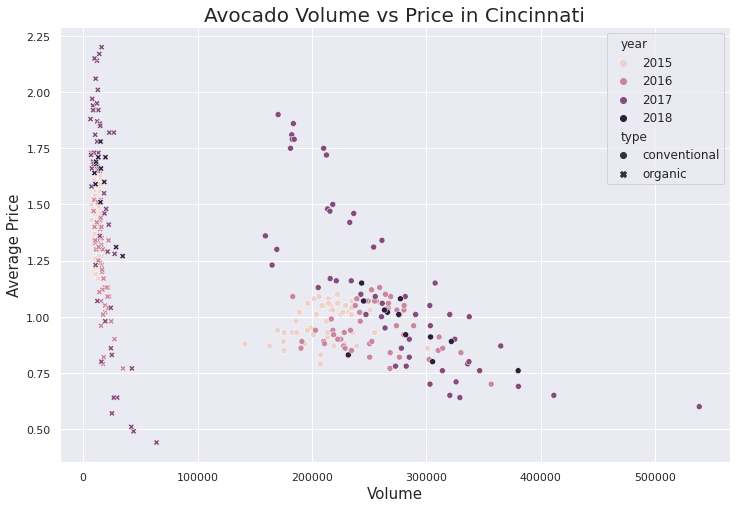

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.scatterplot(data=df_cincy, x='Total Volume', y='AveragePrice', hue='year', style='type')
plt.xlabel("Volume", size=15)
plt.ylabel("Average Price", size=15)
plt.title("Avocado Volume vs Price in Cincinnati", size=20)

This next plot shows the average cost reported weekly over the course of about 3.5 years. The type of avocado is indicated using color, and the amount of avocados is represented through the size of each point. One thing to note is that around July of 2015 there is a period where organic avocados were $1 on average, and this seems like it is likely an error in the dataset especially because of the plot below this one where data from just the Cincinnati area is analyzed, and this phenomina does not occur. Also worth noting, the total volume is expressed as x * 10^6. I also wrote a for loop to reduce the density of the labels on the x axis because they were unreadable before.

Text(0.5, 1.0, 'Avocado Price over Time in the United States')

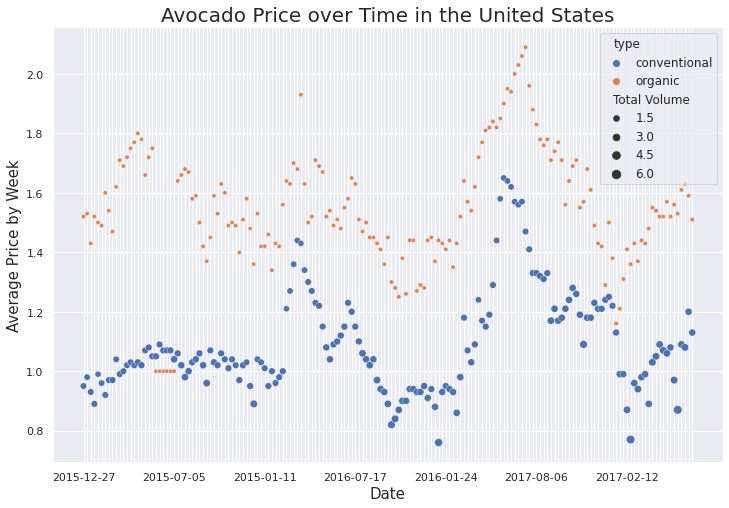

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plot1 = sns.scatterplot(data=df_us, hue='type', x='Date', y='AveragePrice', size='Total Volume')
for lab, label in enumerate(plot1.get_xticklabels()):
    if lab % 25 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel("Date", size=15)
plt.ylabel("Average Price by Week", size=15)
plt.title("Avocado Price over Time in the United States", size=20)

This plot is the same as above, but just using the data from the Cincinnati region.

Text(0.5, 1.0, 'Avocado Price over Time in Cincinnati')

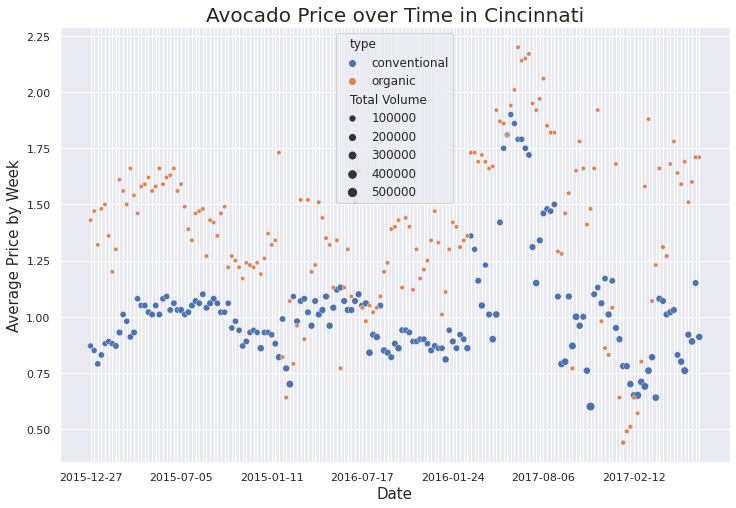

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plot2 = sns.scatterplot(data=df_cincy, x='Date', y='AveragePrice', hue='type', size='Total Volume')
for lab, label in enumerate(plot2.get_xticklabels()):
    if lab % 25 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel("Date", size=15)
plt.ylabel("Average Price by Week", size=15)
plt.title("Avocado Price over Time in Cincinnati", size=20)

The following plot shows the average price per year. This graph clearly shows that organic avocados are more exprensive than conventional avocados which would be expected.

Text(0.5, 1.0, 'Avocado Price by Year in the United States')

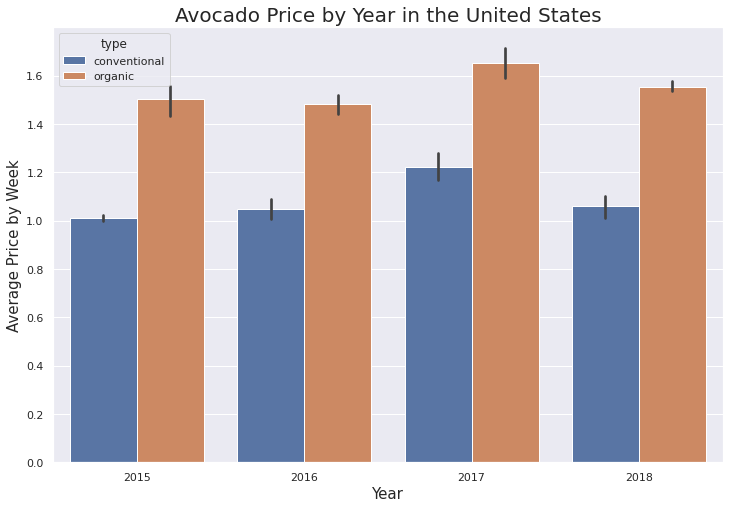

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(data=df_us, x='year', y='AveragePrice', hue='type')
plt.xlabel("Year", size=15)
plt.ylabel("Average Price by Week", size=15)
plt.title("Avocado Price by Year in the United States", size=20)

This plot compares the avacado price across the 3 cities I chose to look at and also shows the price that is the average for the total US for comparison. It was interesting to me that Cincinnati and LA has similar avocado prices even though the cost of living in LA is much higher. This could be explained by a higher volume of avocados bought and or proximity to the farms where avocados are grown. The data used for this is a dataframe including all 4 regions.

Text(0.5, 1.0, 'Avocado Price by Year across Cites compared to the United States')

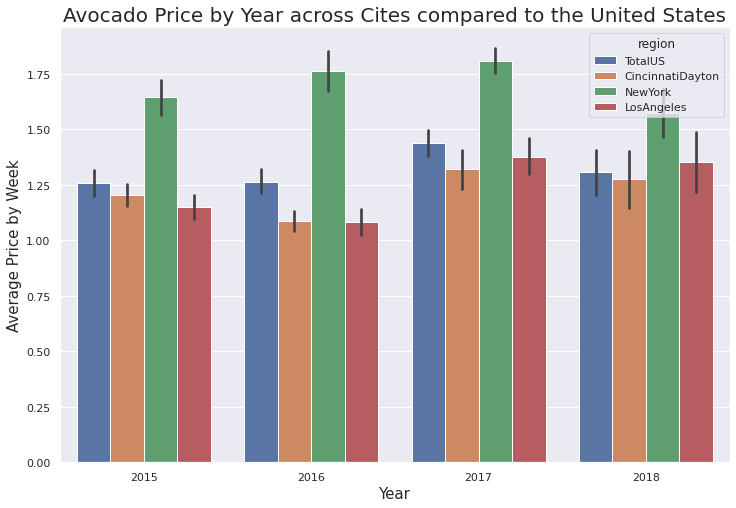

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(data=df_four, x='year', y='AveragePrice', hue='region')
plt.xlabel("Year", size=15)
plt.ylabel("Average Price by Week", size=15)
plt.title("Avocado Price by Year across Cites compared to the United States", size=20)

The last plot is a bar plot of the volume of avocados sold across the three cities we have been analyzing. Cincinnati consumed by far the fewest avocados with NYC in the middle and LA consuming by far the most. A dataframe with all three cities was used in this plot. On the y-axis the values are expressed as x * 10^6, meaning that the expressed value should be multiplied by ten to the sixth to get the accurate value since the values were so large.

Text(0.5, 1.0, 'Avocado Volume by Year across Three Cities')

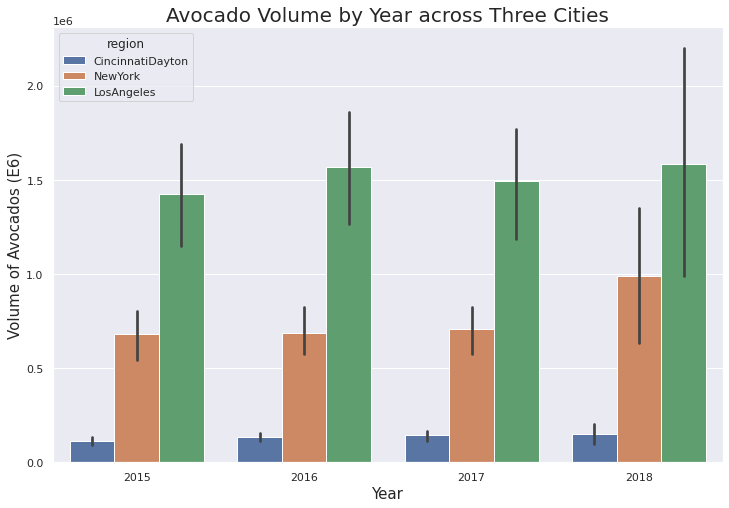

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(data=df_cities, x='year', y='Total Volume', hue='region')
plt.xlabel("Year", size=15)
plt.ylabel("Volume of Avocados (E6)", size=15)
plt.title("Avocado Volume by Year across Three Cities", size=20)

# K Means Clustering
I wrote this in a separete colab file, but moved it over here for simplifying submission, so that is why I redefine some things that are above. Consider this separate, and when this colab notebook is run in order everything should run as intended.

In [122]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Downloads data and creates a dataframe of the csv file
url = 'https://raw.githubusercontent.com/nshaw928/python_final/main/avocado.csv'
df = pd.read_csv(url, index_col=0, parse_dates=True)

# Divides the dataframe into workable sections of interest
df_conv = df[df['type'] == 'conventional']
df_nyc = df_conv[df_conv['region'] == 'NewYork']
df_la = df_conv[df_conv['region'] == 'LosAngeles']

# Combines sections of the dataframe back together
df_nyc_la = pd.concat([df_nyc, df_la])

# Assign parameters to KMeans
km = KMeans(n_clusters=2, max_iter=100, n_init=25)

# Run the KMeans algorithm on the average price and total volume data for NYC and LA
predict = km.fit_predict(df_nyc_la[['AveragePrice','Total Volume']])

# Add a column to the dataframe containing the prediction values
df_nyc_la['cluster'] = predict

###Visualization
Below is the code I used to generate the visualization for the K Means clustering that was done in the previous block. I create a dataframe based on whether the data was assigned a cluster value of 0 or 1. Then I further seperate these dataframes by creating one for each city NYC and LA. Then there are 2 dataframes for each cluster value), and I compare the dataframes to determine which city is more present between the data assigned one cluster value. Then the more prominent city is graphed in orange or pink, and the data that is presumably misclassified is graphed in black.

I have found that K Means did a pretty good job separating the data between the cities, with NYC on the bottom with LA on top, and the data that is misclassified is either in the middle of the two extremes or is an outlier in the data.

Text(0, 0.5, 'Volume (E6)')

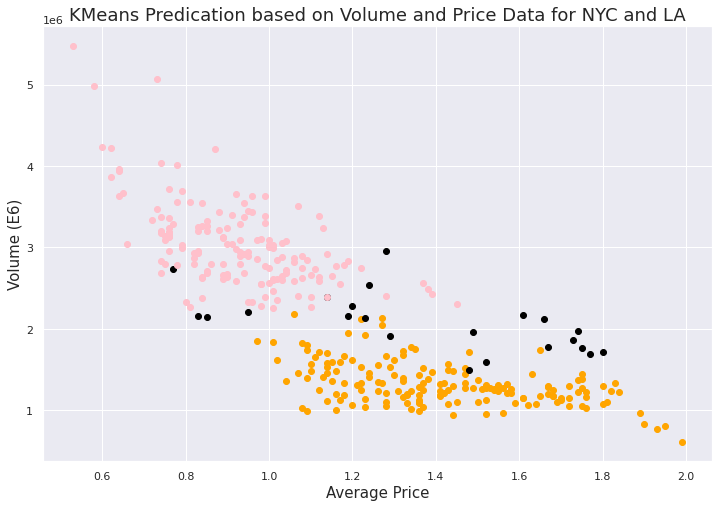

In [123]:
# Create a dataframe for both cluster values
df1 = df_nyc_la[df_nyc_la.cluster==0]
df2 = df_nyc_la[df_nyc_la.cluster==1]

# Further separate these values by city
df11 = df1[df1['region'] == 'NewYork']
df12 = df1[df1['region'] == 'LosAngeles']
df21 = df2[df2['region'] == 'NewYork']
df22 = df2[df2['region'] == 'LosAngeles']

# Adjusts size of plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Compare the dataframes of each city for each cluster values, and plot the more prominent one in orange
if len(df11) > len(df12):
  plt.scatter(df11.AveragePrice,df11['Total Volume'], color='orange')
  plt.scatter(df12.AveragePrice,df12['Total Volume'], color='black')
else:
  plt.scatter(df11.AveragePrice,df11['Total Volume'], color='black')
  plt.scatter(df12.AveragePrice,df12['Total Volume'], color='orange')
# Compare the dataframes of each city for each cluster values, and plot the more prominent one in pink
if len(df21) > len(df22):
  plt.scatter(df21.AveragePrice,df21['Total Volume'], color='pink')
  plt.scatter(df22.AveragePrice,df22['Total Volume'], color='black')
else:
  plt.scatter(df21.AveragePrice,df21['Total Volume'], color='black')
  plt.scatter(df22.AveragePrice,df22['Total Volume'], color='pink')

# Labels for plot
plt.title("KMeans Predication based on Volume and Price Data for NYC and LA", size=18)
plt.xlabel("Average Price", size=15)
plt.ylabel("Volume (E6)", size=15)